In [3]:
import pandas as pd
import numpy as numpy

In [4]:
df=pd.read_csv('emails.csv')

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Define X and y
X = df.drop(columns=['Email No.', 'Prediction'])  # drop the non-feature columns
y = df['Prediction']  # target variable

**Step 1: Split the dataset into training and testing setst**


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4>Scaling the data</h4>

In [58]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 2: Create the Logistic Regression model**

In [59]:
from sklearn.linear_model import LogisticRegression

**Step 3: Train the model**

In [60]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

**Step 4: Make predictions on the test set**

In [61]:
y_pred = model.predict(X_test_scaled)

In [62]:
# Print model details
print("Model Details:")
print(f"Intercept (Bias): {model.intercept_[0]}")
print(f"Coefficients: {model.coef_[0]}")

Model Details:
Intercept (Bias): 0.6872021105811054
Coefficients: [-0.80518488 -0.48972634  0.01339817 ... -0.10369384  0.23684498
 -0.01503541]


**Step 5: Evaluate the model**

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

y_pred_proba = model.predict_proba(X_test_scaled)
print("Predicted Probabilities:")
print(y_pred_proba)


Accuracy: 0.9739130434782609
Confusion Matrix:
[[722  17]
 [ 10 286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       739
           1       0.94      0.97      0.95       296

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

Predicted Probabilities:
[[9.99840210e-01 1.59790198e-04]
 [1.00000000e+00 1.78922675e-67]
 [0.00000000e+00 1.00000000e+00]
 ...
 [9.94227306e-01 5.77269391e-03]
 [5.92813014e-03 9.94071870e-01]
 [1.00000000e+00 2.31267612e-42]]


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

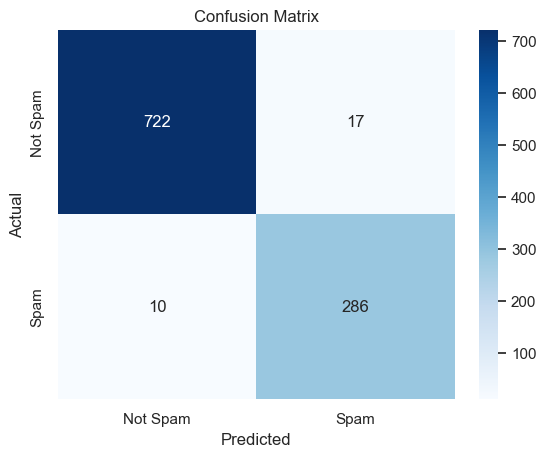

In [77]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()